#### Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2022-11-17 06:37:03.426522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 06:37:03.577451: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-17 06:37:03.581878: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-17 06:37:03.581890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

#### Static Variables

In [2]:
VOCAB_SIZE = 10000

TRAIN_SIZE = 0.2
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# in embedding layer
OUTPUT_DIM = 64

# in training
EPOCHS = 8

#### Gather data

In [3]:
neutral_csv="/home/madhu/Documents/practice/machine_learning/projects/twitter_classification/processedNeutral.csv"
negative_csv="/home/madhu/Documents/practice/machine_learning/projects/twitter_classification/processedNegative.csv"
positive_csv="/home/madhu/Documents/practice/machine_learning/projects/twitter_classification/processedPositive.csv"

neu_df = pd.read_csv(neutral_csv)
neg_df = pd.read_csv(negative_csv)
pos_df = pd.read_csv(positive_csv)

In [4]:
neu_df = pd.DataFrame(np.vstack(neu_df.columns), columns=['tweets'])
neg_df = pd.DataFrame(np.vstack(neg_df.columns), columns=['tweets'])
pos_df = pd.DataFrame(np.vstack(pos_df.columns), columns=['tweets'])

In [5]:
neg_df.head()

,tweets
0,How unhappy some dogs like it though
1,talking to my over driver about where I'm goin...
2,Does anybody know if the Rand's likely to fall...
3,I miss going to gigs in Liverpool unhappy
4,There isnt a new Riverdale tonight ? unhappy


In [6]:
neg_df['sentiment'] = 0
neu_df['sentiment'] = 2
pos_df["sentiment"] = 1

In [7]:
pos_df[pos_df['tweets'] == "LEGO_Group: LegoThursdays JokerSquad_SWG LEGOLANDWindsor Sounds like you had lots of fun! happy"]

,tweets,sentiment
153,LEGO_Group: LegoThursdays JokerSquad_SWG LEGOL...,1


In [8]:
dataset = pos_df.append(neu_df)
dataset = dataset.append(neg_df)

/tmp/ipykernel_7466/3827594804.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = pos_df.append(neu_df)
/tmp/ipykernel_7466/3827594804.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(neg_df)


In [9]:
dataset.columns

Index(['tweets', 'sentiment'], dtype='object')

In [10]:
dataset.sentiment.unique()

array([1, 2, 0])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3873 entries, 0 to 1116
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     3873 non-null   object
 1   sentiment  3873 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.8+ KB


In [12]:
neu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     1570 non-null   object
 1   sentiment  1570 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.7+ KB


In [13]:
neg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     1117 non-null   object
 1   sentiment  1117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.6+ KB


In [14]:
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweets     1186 non-null   object
 1   sentiment  1186 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [15]:
dataset.head()

,tweets,sentiment
0,An inspiration in all aspects: Fashion,1
1,fitness,1
2,beauty and personality. :)KISSES TheFashionIcon,1
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1
4,Beautiful album from the greatest unsung guit...,1


#### Split the data

In [16]:
indexes = np.random.rand(len(dataset)) < TRAIN_SIZE # random

train_ds = dataset[indexes]
test_ds = dataset[indexes]

#### Convert to Tensors

In [17]:
train_ds = tf.data.Dataset.from_tensor_slices((train_ds['tweets'], train_ds['sentiment']))
test_ds = tf.data.Dataset.from_tensor_slices((test_ds['tweets'], test_ds['sentiment']))

2022-11-17 06:37:05.544161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 06:37:05.544367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-17 06:37:05.544396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-17 06:37:05.544421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-17 06:37:05.544443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [18]:
for s,l in train_ds.take(1):
    print(s.numpy()[:2], l.numpy())

b'An' 1


#### Shuffle, Batch and Prefetch

In [19]:
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#### Vectorization

In [20]:
vector_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)

In [21]:
vector_layer.adapt(train_ds.map(lambda samples, labels:samples))

In [22]:
vector_layer.get_vocabulary()[:10]

['', '[UNK]', 'to', 'unhappy', 'i', 'the', 'happy', 'for', 'in', 'a']

#### Build the model

In [23]:
model = tf.keras.Sequential([
    vector_layer,
    
    tf.keras.layers.Embedding(input_dim=len(vector_layer.get_vocabulary()), output_dim=OUTPUT_DIM, mask_zero=True),
    
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    ),
        
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)
    ),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

#### Sample Test

In [24]:
#### Sample test
for s,l in test_ds.take(1):
    st = s.numpy()[2]
    preditction = model.predict([st])
    print(preditction)

1/1 [==============================] - 3s 3s/step
[[0.33278385 0.33379376 0.33342245]]


In [25]:
# after adding padding
padding = "the " * 200
for s,l in test_ds.take(1):
    st = s.numpy()[2]
    preditction = model.predict(np.array([st, padding]))
    print(preditction)

1/1 [==============================] - 0s 63ms/step
[[0.33278385 0.33379376 0.33342245]
 [0.33613467 0.32930154 0.33456376]]


#### Compile

In [26]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

#### Train

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=test_ds
)

Epoch 1/8
12/12 [==============================] - 9s 224ms/step - loss: 0.9912 - accuracy: 0.5418 - val_loss: 1.0714 - val_accuracy: 0.4778
Epoch 2/8
12/12 [==============================] - 0s 30ms/step - loss: 0.5659 - accuracy: 0.8264 - val_loss: 0.9634 - val_accuracy: 0.8695
Epoch 3/8
12/12 [==============================] - 0s 30ms/step - loss: 0.2245 - accuracy: 0.9321 - val_loss: 0.8361 - val_accuracy: 0.9465
Epoch 4/8
12/12 [==============================] - 0s 30ms/step - loss: 0.1214 - accuracy: 0.9608 - val_loss: 0.7591 - val_accuracy: 0.9648
Epoch 5/8
12/12 [==============================] - 0s 30ms/step - loss: 0.0557 - accuracy: 0.9843 - val_loss: 0.6990 - val_accuracy: 0.9791
Epoch 6/8
12/12 [==============================] - 0s 32ms/step - loss: 0.0379 - accuracy: 0.9869 - val_loss: 0.6837 - val_accuracy: 0.9869
Epoch 7/8
12/12 [==============================] - 0s 31ms/step - loss: 0.0150 - accuracy: 0.9974 - val_loss: 0.6403 - val_accuracy: 0.9883
Epoch 8/8
12/12 [==

In [28]:
history.history

{'loss': [0.9912161827087402,
  0.5659124851226807,
  0.22452545166015625,
  0.12138445675373077,
  0.055684108287096024,
  0.03791528195142746,
  0.015008075162768364,
  0.007691277656704187],
 'accuracy': [0.5417754650115967,
  0.8263707756996155,
  0.9321148991584778,
  0.9608355164527893,
  0.9843342304229736,
  0.9869451522827148,
  0.997389018535614,
  1.0],
 'val_loss': [1.0713993310928345,
  0.9634491801261902,
  0.8360914587974548,
  0.7591390013694763,
  0.6990126967430115,
  0.6836507320404053,
  0.6403312683105469,
  0.6057031750679016],
 'val_accuracy': [0.47780677676200867,
  0.8694517016410828,
  0.9464752078056335,
  0.9647519588470459,
  0.9791122674942017,
  0.9869451522827148,
  0.9882506728172302,
  0.9882506728172302]}

#### Evaluate

In [29]:
# test 
test_histotry = model.evaluate(test_ds)
test_histotry

12/12 [==============================] - 0s 8ms/step - loss: 0.6057 - accuracy: 0.9883


[0.6057031750679016, 0.9882506728172302]

In [30]:
# sample prediction
sample = ""
label = ""
for s, l in test_ds.take(1):
    sample = s.numpy()[25]
    label = l.numpy()[25]
print(sample)
print(label)
prediction = model.predict(np.array([sample]))
print("")
print("Predicted output", prediction.argmax())

b'you guys are entertaining and insightful... and one of the reasons i have been really enjoying LPL a lot more this season :D'
1
1/1 [==============================] - 2s 2s/step

Predicted output 1


#### Ploting Accuracy and Loss

(0.0, 1.124584733764641)

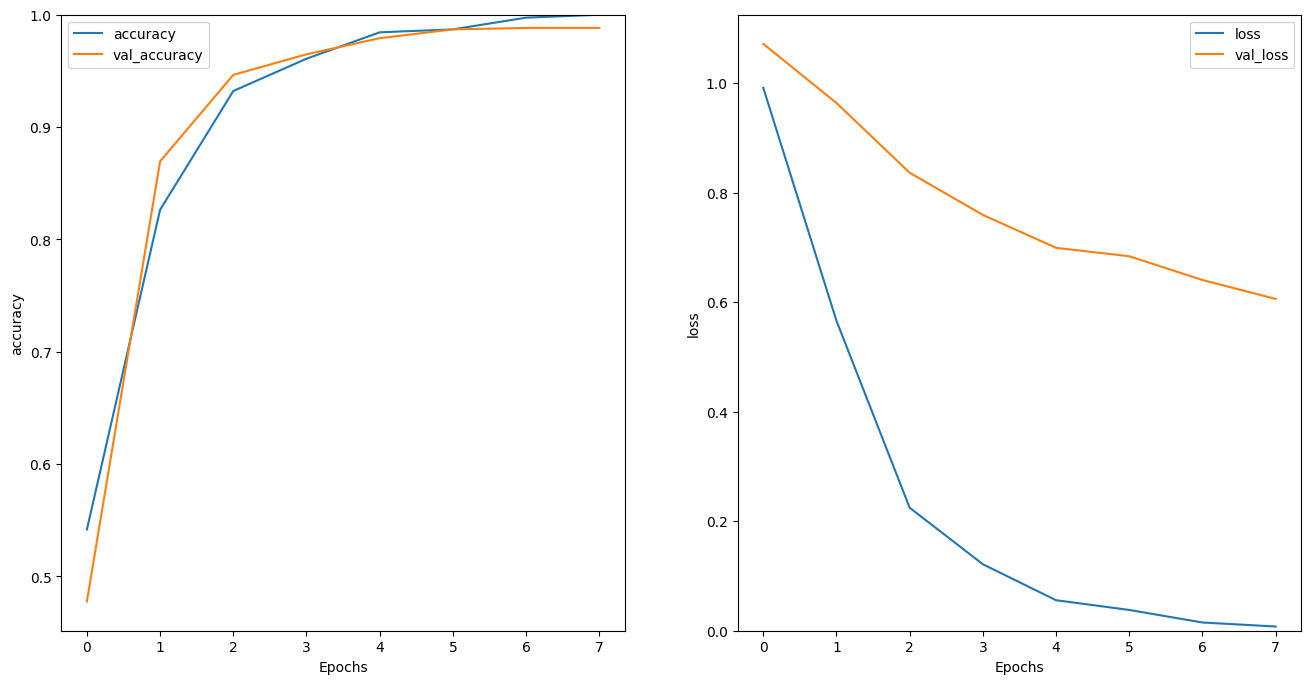

In [31]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)